In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('..\src')
from bf_quantum_state import BFQuantumState
from tfim_hamiltonian_open_fermion import TfimHamiltonianOpenFermion

In [3]:
# calculate two point correlation for different distances and ratios h/J

def calc_two_point_correlation(ratios: np.array, qubit_num: int):
    distance = np.arange(0, qubit_num, 1)
    correlations = np.zeros(qubit_num)
    for j in range(0, np.size(ratios)):
        for i in range(0, qubit_num):
            ground_state = TfimHamiltonianOpenFermion(qubit_num, ratios[j], 1, 'open').ground_state_wavevector()
            correlations[i] = BFQuantumState(qubit_num, ground_state).two_point_correlation(
                distance[i])
        save_direc = 'data\Twopointcorrelation\correlation_for_ratio ' + str(ratios[j]).replace('.',
                                                                                                ',') + ' and qubit number ' + str(
            qubit_num)
        np.savetxt(save_direc, correlations)

In [4]:
def plot_two_point_correlation(ratios: np.array, qubit_num: int):
    for i in range(0, np.size(ratios)):
        save_direc = 'data\Twopointcorrelation\correlation_for_ratio ' + str(ratios[i]).replace('.',
                                                                                                ',') + ' and qubit number ' + str(
            qubit_num)
        correlations = np.loadtxt(save_direc)
        distance = np.arange(0, qubit_num, 1)
        plt.scatter(distance, np.abs(correlations), label='ratio h/J = ' + str(ratios[i]))
        plt.yscale('log')
        plt.title('two point correlation for different distances and ratios')
        plt.xlabel('distance, j-th neighbour')
        plt.ylabel('two_point_correlation')
        plt.legend()
    plot_save_direc = 'plots\Two_point_correlation_brute_force\correlation_for_ratio ' + str(ratios).replace('.',
                                                                                                             ',') + ' and qubit number ' + str(
        qubit_num)
    plt.savefig(plot_save_direc)

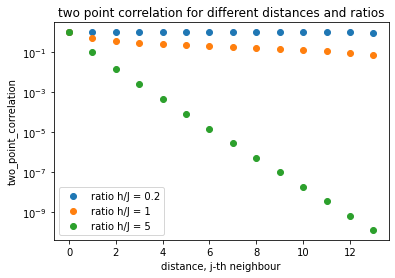

In [5]:
calc_two_point_correlation([0.2, 1, 5], 14)
plot_two_point_correlation([0.2, 1, 5], 14)